# COVID 19 Detection using X ray Classification

<center> <img src= "https://resize.indiatvnews.com/en/resize/newbucket/715_-/2020/04/odisha-1585908668.jpg" alt="covid" /> </center>

In this project, we are going to create an Image Classification model using FastAI to predict whether the image diagnosed has signs of Covid 19 infection or not.

FastAI is a deep learning library which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches. It aims to do both things without substantial compromises in ease of use, flexibility, or performance. 

## The dataset

In the following
<a href="https://drive.google.com/file/d/16LSvHW6VDiMsyrPs-Bp9EVBMt_4lkxm7/view?usp=sharing"> Link </a> , we have X-Ray images of COVID+ and COVID- patients. 
- The training dataset consists of 250 images having equal number of both clases.
- The validation dataset consists of 110 images with equal distribution.

In [ ]:
# Upload google drive in our COLAB

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create path and unzip the file

!unzip '/content/drive/My Drive/Pytorch/COVID_DATA.zip'

Archive:  /content/drive/My Drive/Pytorch/COVID_DATA.zip
   creating: COVID_DATA/
   creating: COVID_DATA/train/
   creating: COVID_DATA/train/COVID+/
  inflating: COVID_DATA/train/COVID+/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_DATA/train/COVID+/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_DATA/train/COVID+/0a7faa2a.jpg  
  inflating: COVID_DATA/train/COVID+/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_DATA/train/COVID+/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_DATA/train/COVID+/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_DATA/train/COVID+/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_DATA/train/COVID+/1-s2.0-S1684118220300682-main.pdf-003-b2.png  
  inflating: COVID_DATA/train/COVID+/1-s2.0-S2214250920300834-gr1_lrg-b.png  
  inflating: COVID_DATA/train/COVID+/1-s2.0-S2387020620301959-gr4_lrg-b.png  
  inflating: COVID_DATA/train/COVID+/1.CXRCTThoraximagesofCOVI

In [ ]:
!ls -l     # Check the folder structure

total 12
drwxr-xr-x 4 root root 4096 Jul 31  2021 COVID_DATA
drwx------ 5 root root 4096 Jul 31 06:08 drive
drwxr-xr-x 1 root root 4096 Jul 16 13:20 sample_data


In [ ]:
# Import the Libraries
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [ ]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Setting the Batch size
bs = 64

In [ ]:
# Let's read the data and create DataBunch
data = ImageDataBunch.from_folder(path = 'COVID_DATA', train='train', valid='val', ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

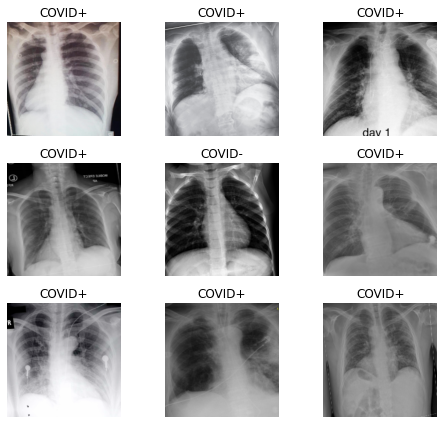

In [ ]:
# Have a look at the training data
data.show_batch(rows=3, figsize=(7,6))

These images have been resized to 224x224 pixels which works for most transfer learning models. We have also applied some basic image transformations and normalized the images.

In [ ]:
# Let's check the labels
print(data.classes)

['COVID+', 'COVID-']


# Create a ResNet model

For this classification, we will use a pre-trained ResNet model.
The architecture will be a RestNet 34.

Pre-trained models are beneficial to us for many reasons. By using a pre-trained model you are saving time. Someone else has already spent the time and compute resources to learn a lot of features and your model will likely benefit from it.

The metrics we will be focussing on with be error_rate and accuracy.

In [ ]:
learn = cnn_learner(data = data, base_arch= models.resnet34, metrics = [error_rate, accuracy] )

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


In [ ]:
# Let's look at the architecture
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
# Let's train the pre-trained model for 4 epochs
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.198752,0.361868,0.145455,0.854545,00:18
1,0.618506,0.123178,0.036364,0.963636,00:17
2,0.405894,0.051852,0.009091,0.990909,00:17
3,0.299465,0.029032,0.009091,0.990909,00:19


With a pre-trained model, we are achieving very high accuracy very quickly. <br>
Let's look at the predictions on validation / test.

# Predictions

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idx = interp.top_losses()

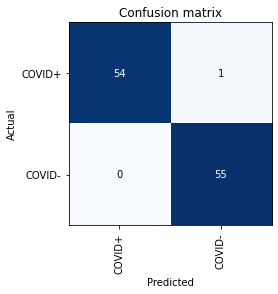

In [ ]:
interp.plot_confusion_matrix()

The model is predicting very accurately on test data. Only 1 mistake. Let's look at some of the predictions.

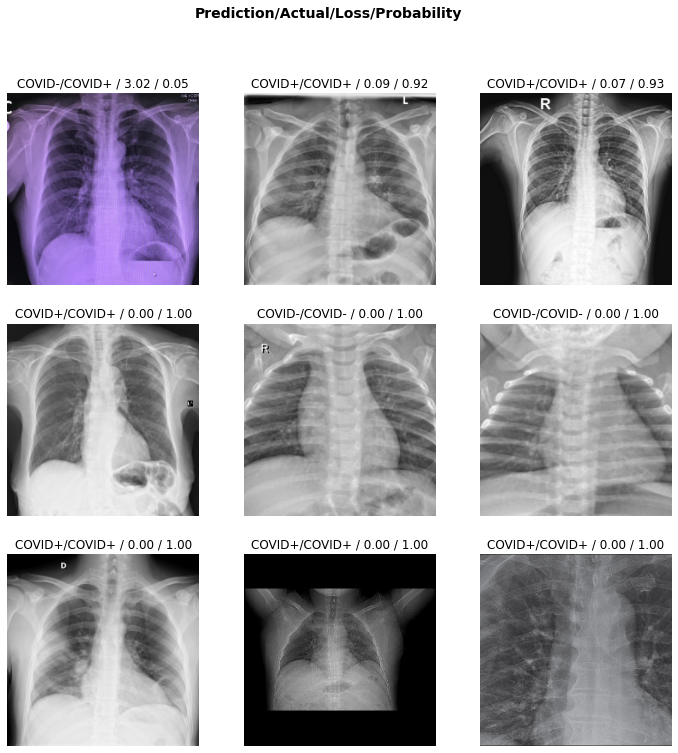

In [ ]:
interp.plot_top_losses(9, figsize=(12,12))

In these images, the labels are Predicted, Actual, Loss and Probability. <br>
The model has not overfit, but has learn't correctly.

In [ ]:
# Let's save the model.
learn.save('stage-1', return_path=True)

PosixPath('COVID_DATA/models/stage-1.pth')

Now we can download it and start using it in production.

# Conclusion

In this notebook, we observed:
- How to use Fast AI to create quick image classification model
- How to read images, apply transformation, batching images efficiently
- How pre-trained models help us getting good results.

Future work:
- We can collect a lot more data and use the saved model to see how it performs on unseen data.
- We can also create a larger model when we have huge amount of data.

**THE END**